# Car Price Prediction

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


# 1. Data understanding and exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float", "{:.2f}".format)

In [2]:
data = pd.read_csv('data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [5]:
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")
    if data[column].nunique() < 10:
        print(f"{data[column].value_counts()}")
    print("====================================")

car_ID: 205
symboling: 6
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
CarName: 147
fueltype: 2
gas       185
diesel     20
Name: fueltype, dtype: int64
aspiration: 2
std      168
turbo     37
Name: aspiration, dtype: int64
doornumber: 2
four    115
two      90
Name: doornumber, dtype: int64
carbody: 5
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
drivewheel: 3
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
enginelocation: 2
front    202
rear       3
Name: enginelocation, dtype: int64
wheelbase: 53
carlength: 75
carwidth: 44
carheight: 49
curbweight: 171
enginetype: 7
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
cylindernumber: 7
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
enginesize: 44
fuelsystem

## `car_ID`

In [6]:
data.car_ID.nunique()

205

In [7]:
data.set_index('car_ID', inplace=True)
data.index.name = None
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


## `price`

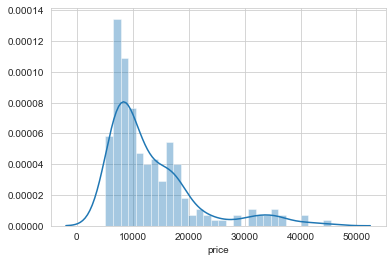

In [8]:
sns.distplot(data.price, bins=30)

## Discrete Features

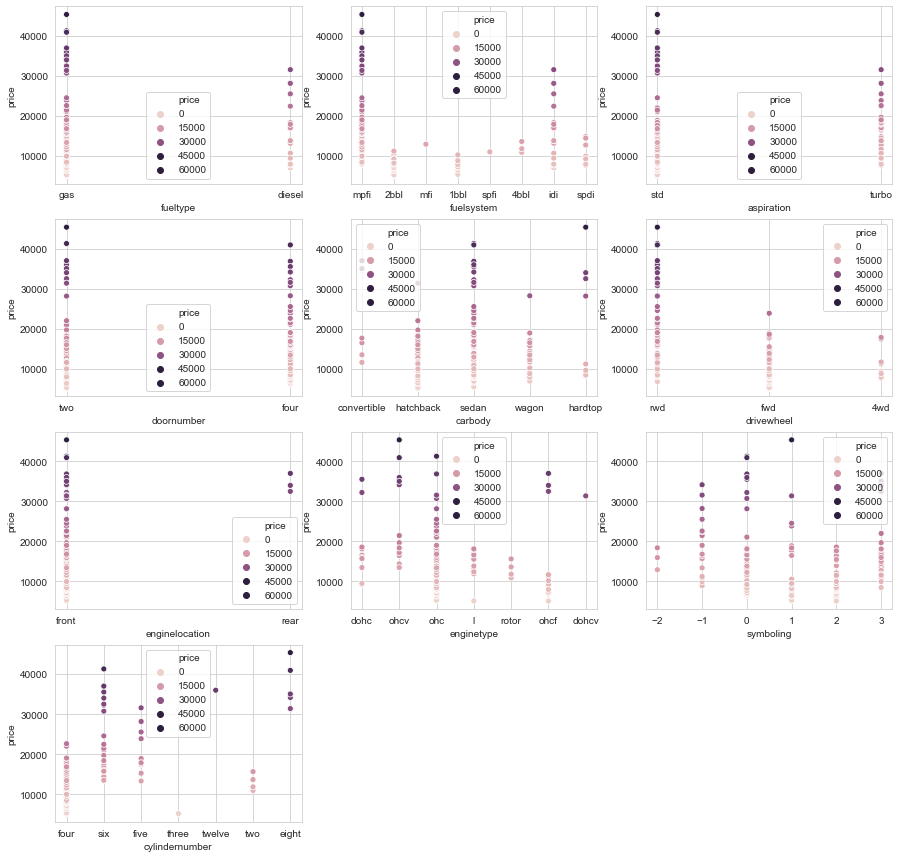

In [9]:
discrete_col = ['fueltype', 'fuelsystem', 'aspiration', 'doornumber', 'carbody', 
                'drivewheel', 'enginelocation', 'enginetype', 'symboling', 
                'cylindernumber']
plt.figure(figsize=(15, 15))
for i, column in enumerate(discrete_col, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(column, 'price', data=data, hue='price')

## Continuous Features

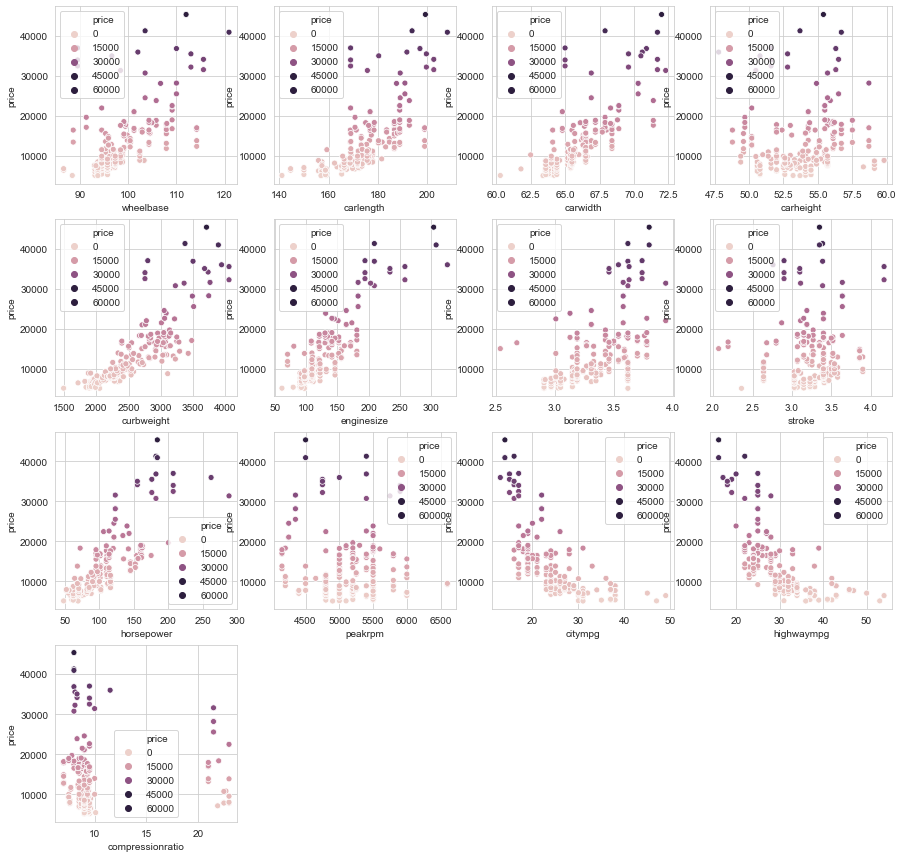

In [10]:
continous_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 
                 'compressionratio']
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_col, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(column, 'price', data=data, hue='price')

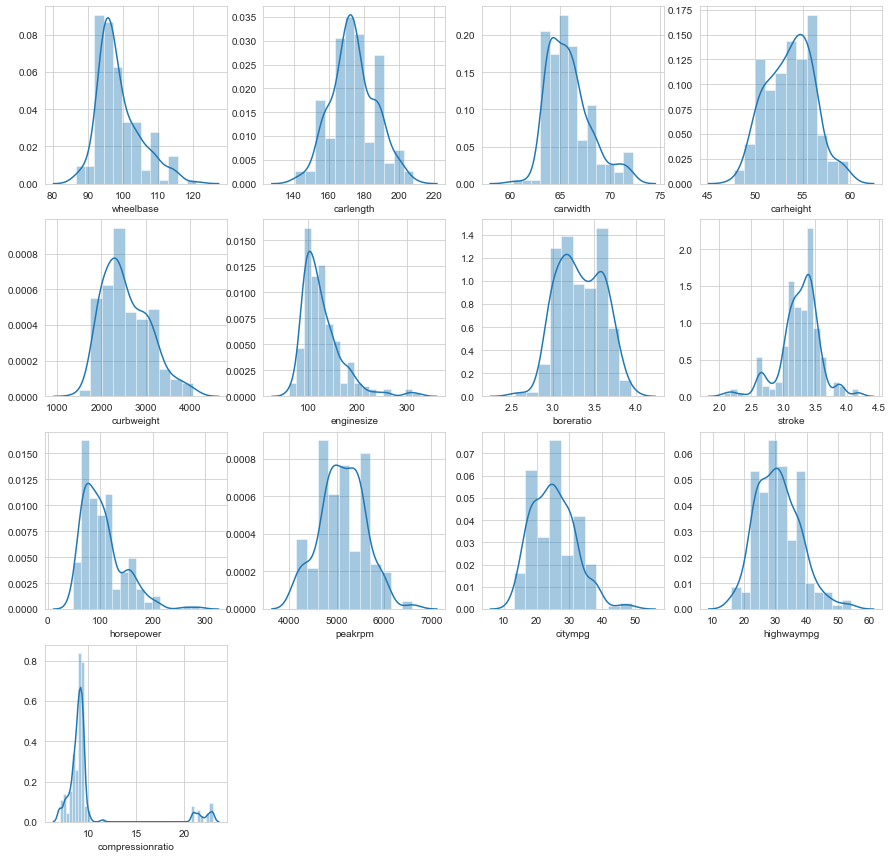

In [11]:
continous_col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 
                 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 
                 'compressionratio']
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_col, 1):
    plt.subplot(4, 4, i)
    sns.distplot(data[column])

## Correlation Analysis

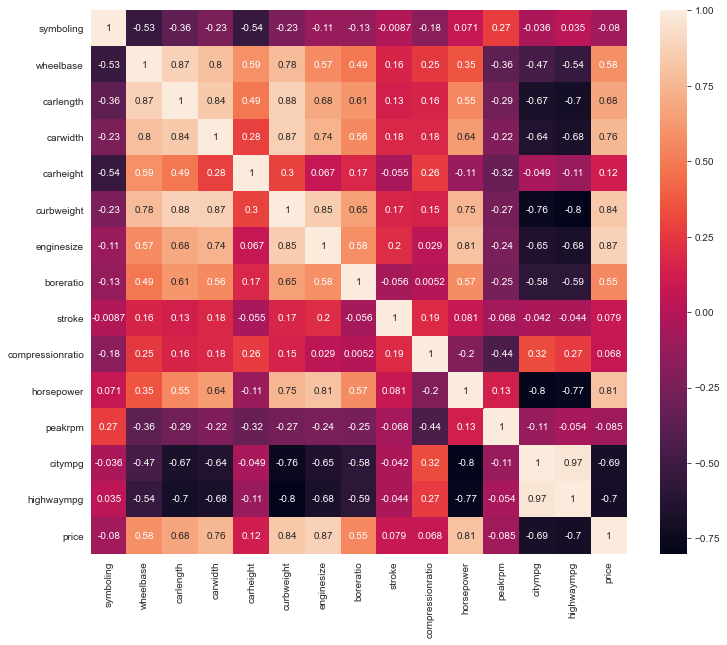

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

The heatmap shows some useful insights:

Correlation of price with independent variables:
- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

- Price is negatively correlated to ```citympg``` and ```highwaympg``` (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:
- Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

# 2. Data Cleaning

## `CarName`

In [13]:
data.CarName.nunique()

147

In [14]:
data['brand'] = data.CarName.str.split(' ', expand=True)[0].str.lower()

data['brand'] = data.brand.str.replace('toyouta', 'toyota')
data['brand'] = data.brand.str.replace('porcshce', 'porsche')
data['brand'] = data.brand.str.replace('maxda', 'mazda')
data['brand'] = data.brand.str.replace('vw', 'volkswagen').str.replace('vokswagen', 'volkswagen')
data['brand'] = data.brand.str.replace('vw', 'volkswagen').str.replace('vokswagen', 'volkswagen')

data.brand.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: brand, dtype: int64

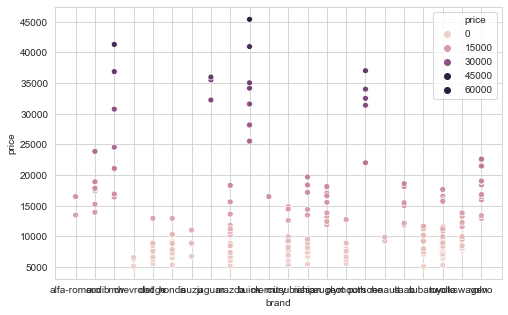

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot('brand', 'price', data=data, hue='price')

In [16]:
data.brand.nunique()

22

In [17]:
data.drop('CarName', axis=1, inplace=True)

# 3. Data Pre-processing

In [18]:
object_features = data.select_dtypes(include=('object')).columns.tolist()
object_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'brand']

In [19]:
data_1 = pd.get_dummies(data, columns=object_features, drop_first=True, dtype='uint8')

In [20]:
data_1.dtypes

symboling                  int64
wheelbase                float64
carlength                float64
carwidth                 float64
carheight                float64
curbweight                 int64
enginesize                 int64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower                 int64
peakrpm                    int64
citympg                    int64
highwaympg                 int64
price                    float64
fueltype_gas               uint8
aspiration_turbo           uint8
doornumber_two             uint8
carbody_hardtop            uint8
carbody_hatchback          uint8
carbody_sedan              uint8
carbody_wagon              uint8
drivewheel_fwd             uint8
drivewheel_rwd             uint8
enginelocation_rear        uint8
enginetype_dohcv           uint8
enginetype_l               uint8
enginetype_ohc             uint8
enginetype_ohcf            uint8
enginetype_ohcv            uint8
enginetype

In [21]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_1.drop('price', axis=1)
y = data_1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [23]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print(f'MAE:\t\t {mae:.4f}')
        print(f'MSE:\t\t {mse:.4f}')
        print(f'RMSE:\t\t {rmse:.4f}')
        print(f'R2 Square:\t {r2_square:.4f}')
    elif not train:
        print("=========Testing Result=======")
        print(f'MAE:\t\t {mae:.4f}')
        print(f'MSE:\t\t {mse:.4f}')
        print(f'RMSE:\t\t {rmse:.4f}')
        print(f'R2 Square:\t {r2_square:.4f}')

# 4. Model Building

## 4. 1. Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(normalize=True)
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:		 898.5240
MSE:		 1327180.6315
RMSE:		 1152.0333
R2 Square:	 0.9782
=========Testing Result=======
MAE:		 2072.7333
MSE:		 7942216.1984
RMSE:		 2818.1938
R2 Square:	 0.8854


### Feature selection using RFE

In [27]:
from sklearn.feature_selection import RFE

rfe_30 = RFE(lr_model, 30)
rfe_30.fit(X_train, y_train)

print(rfe_30.support_)
print(rfe_30.ranking_)

[False  True False  True False  True  True  True False False False  True
 False False False  True False False  True  True  True False False  True
 False  True False False  True  True False False False False False  True
  True False False False  True False False False  True  True False  True
  True False False  True False  True  True  True  True  True  True False
 False  True  True False]
[13  1  2  1  6  1  1  1 24 10 16  1 18 26 12  1 27 33  1  1  1 17  4  1
 15  1 22 31  1  1  3 21  8 35  9  1  1 30 11 34  1 29 28 32  1  1  7  1
  1 14 23  1 20  1  1  1  1  1  1 25  5  1  1 19]


C:\Users\X270\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
y_train_pred = rfe_30.predict(X_train)
y_test_pred = rfe_30.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

# 4. 2. Artificial Neural Networks

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(0.01), loss='mse')

In [ ]:
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=512,
              epochs=200)

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)